<a href="https://colab.research.google.com/github/katsukiyamamoto/EU_M_Math/blob/main/Chap09_Ex02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn

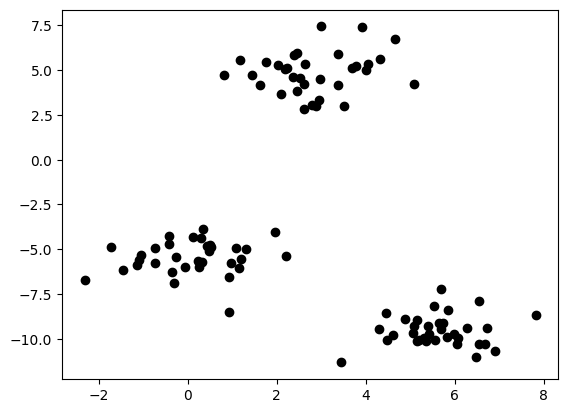

In [2]:
#9-2-2-1

from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

X, _ = make_blobs(random_state=10)

plt.scatter(X[:,0], X[:,1], color='black')

In [3]:
#9-2-2-2

kmeans = KMeans(init='random',n_clusters=3)

kmeans.fit(X)

y_pred = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


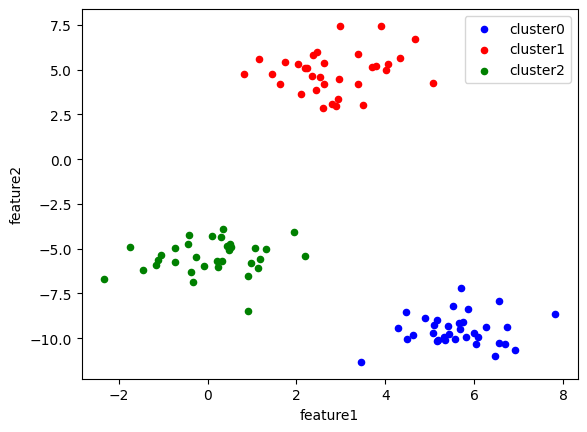

In [4]:
#9-2-2-3

merge_data = pd.concat([pd.DataFrame(X[:,0]),pd.DataFrame(X[:,1]) ,pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1','feature2','cluster']

ax = None
colors = ['blue','red','green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1',y='feature2',color=colors[i],label=f'cluster{i}',ax=ax)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'distortion')

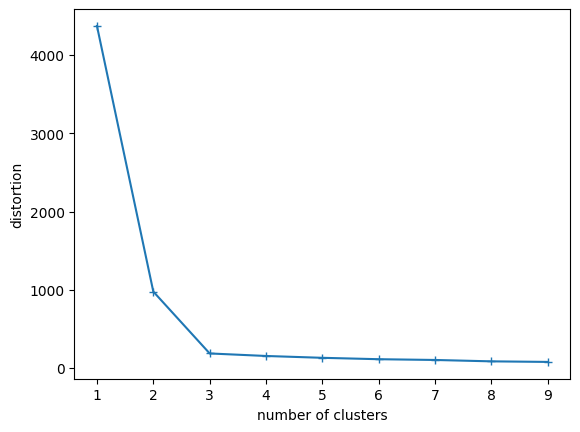

In [5]:
#9-2-4

dist_list = []
for i in range(1,10):
    kmeans = KMeans(init='random',n_clusters=i)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,10),dist_list,marker='+')
plt.xlabel('number of clusters')
plt.ylabel('distortion')

In [7]:
import requests, zipfile, io

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))

In [9]:
from sklearn.preprocessing import StandardScaler

bank = pd.read_csv(z.open('bank-additional/bank-additional-full.csv'),sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
bank_sub = bank[['age','campaign','pdays','previous']]

scaler = StandardScaler()
bank_sub_std = scaler.fit_transform(bank_sub)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'distortion')

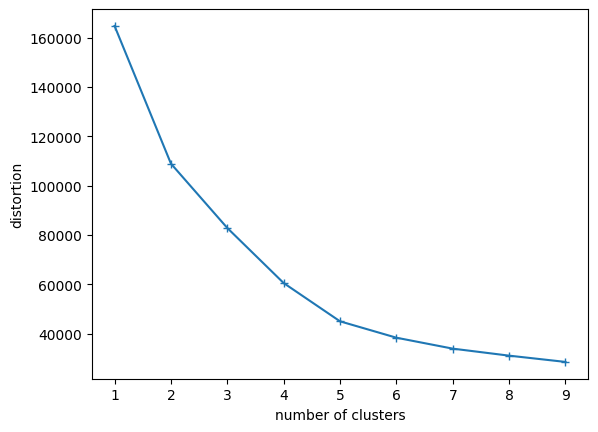

In [14]:
dist_list = []
for i in range(1,10):
    kmeans = KMeans(init='random',n_clusters=i)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,10),dist_list,marker='+')
plt.xlabel('number of clusters')
plt.ylabel('distortion')

相関関係0.889:


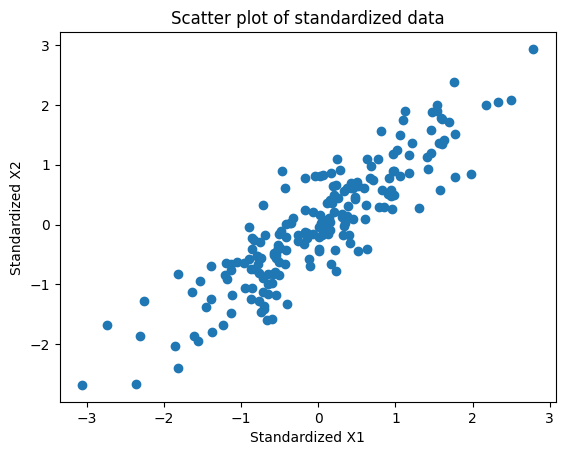

In [17]:
#9-3-1
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy as sp
import matplotlib.pyplot as plt

# サンプルデータの生成
sample = np.random.RandomState(1)
X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関関係の計算とプロット
correlation = sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]
print('相関関係{:.3f}:'.format(correlation))
plt.scatter(X_std[:, 0], X_std[:, 1])
plt.xlabel('Standardized X1')
plt.ylabel('Standardized X2')
plt.title('Scatter plot of standardized data')
plt.show()


In [19]:
#9-3-1-1

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)

print(pca.components_)
print('各主成分の分散:()'.format(pca.explained_variance_))
print('各主成分の分散割合:()'.format(pca.explained_variance_ratio_))

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
各主成分の分散:()
各主成分の分散割合:()


(-3.3534087054527717,
 3.079070151762556,
 -2.9610077757452697,
 3.2159825436132246)

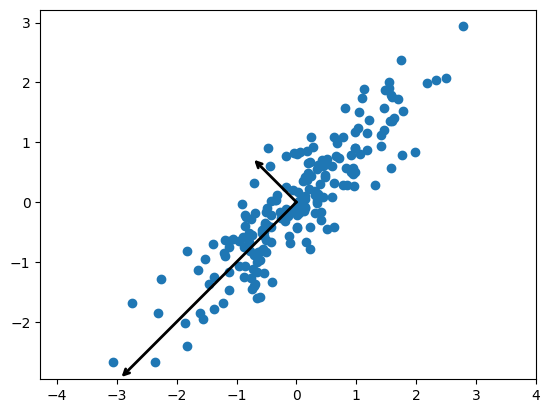

In [20]:
arrowprops = dict(arrowstyle='->',linewidth=2,shrinkA=0,shrinkB=0)

def draw_vector(v0, v1):
    plt.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X_std[:, 0], X_std[:, 1])

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')

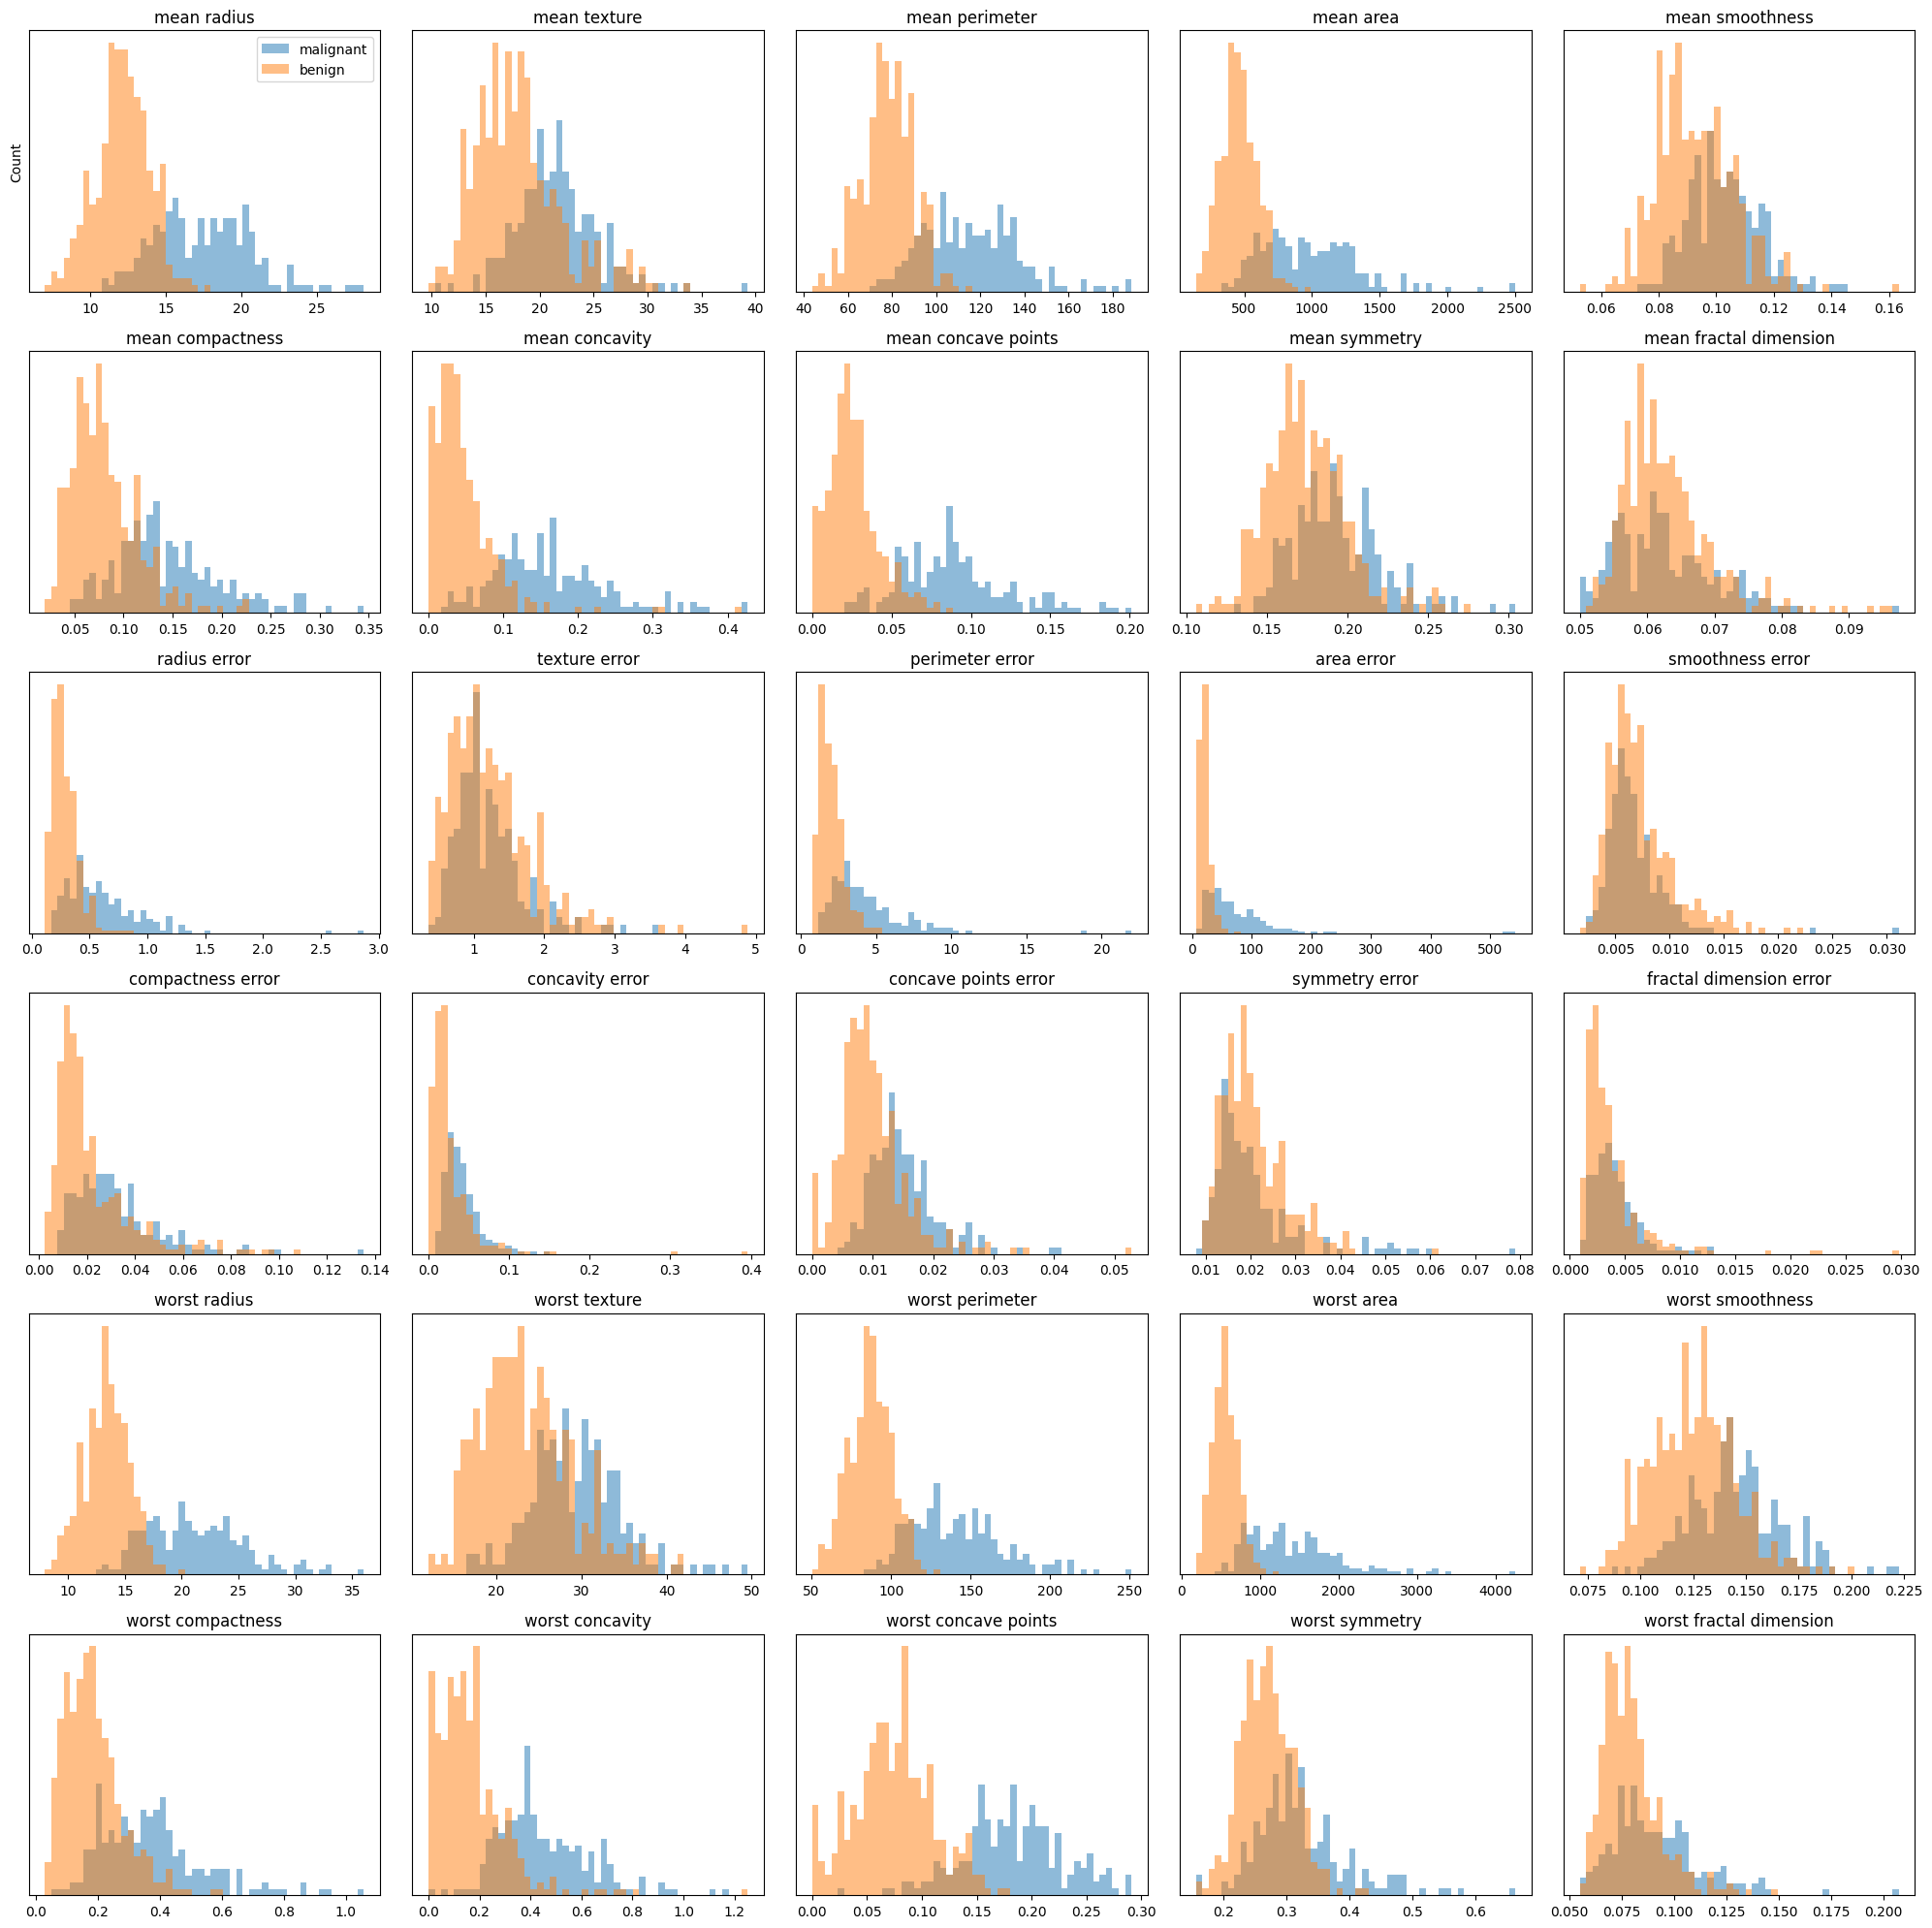

In [21]:
#9=3=2

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins,alpha=.5)
    ax[i].hist(benign[:,i],bins,alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

X_pca shape:(569, 2)
Explained Variance ratio:[0.44272026 0.18971182]


<Axes: xlabel='PC1', ylabel='PC2'>

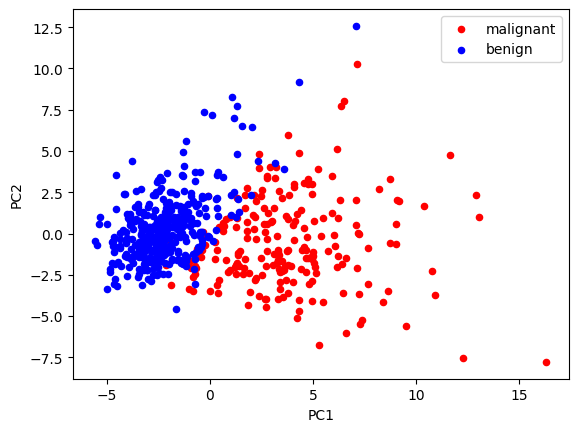

In [22]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('X_pca shape:{}'.format(X_pca.shape))
print('Explained Variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca = pd.DataFrame(X_pca, columns=['PC1','PC2'])
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

ax = pca_malignant.plot.scatter(x='PC1',y='PC2',color='red',label='malignant')
pca_benign.plot.scatter(x='PC1',y='PC2',color='blue',label='benign',ax=ax)

In [23]:
#練習問題9-2

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()

sc = StandardScaler()
sc.fit(iris.data)
X_std = sc.fit_transform(iris.data)

pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('X_pca shape:{}'.format(X_pca.shape))
print('Explained Variance ratio:{}'.format(pca.explained_variance_ratio_))

print('主成分分析前のデータ次元:{}'.format(iris.data.shape))
print('主成分分析後のデータ次元:{}'.format(X_pca.shape))

X_pca shape:(150, 2)
Explained Variance ratio:[0.72962445 0.22850762]
主成分分析前のデータ次元:(150, 4)
主成分分析後のデータ次元:(150, 2)


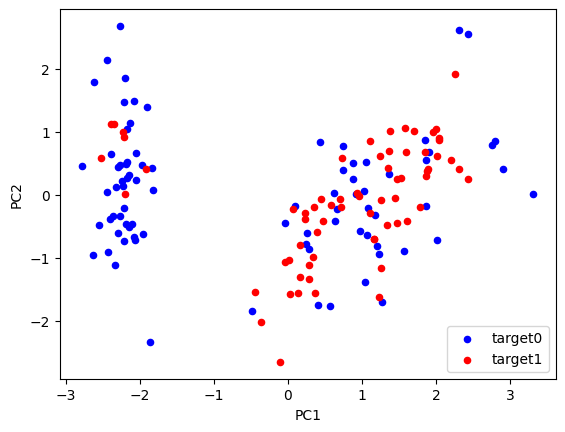

In [24]:
merge_data = pd.concat([pd.DataFrame(X_pca[:,0]),pd.DataFrame(X_pca[:,1]) ,pd.DataFrame(cancer.target)], axis=1)
merge_data.columns = ['PC1','PC2','target']

ax = None
colors = ['blue','red','green']
for i, data in merge_data.groupby('target'):
    ax = data.plot.scatter(x='PC1',y='PC2',color=colors[i],label=f'target{i}',ax=ax)

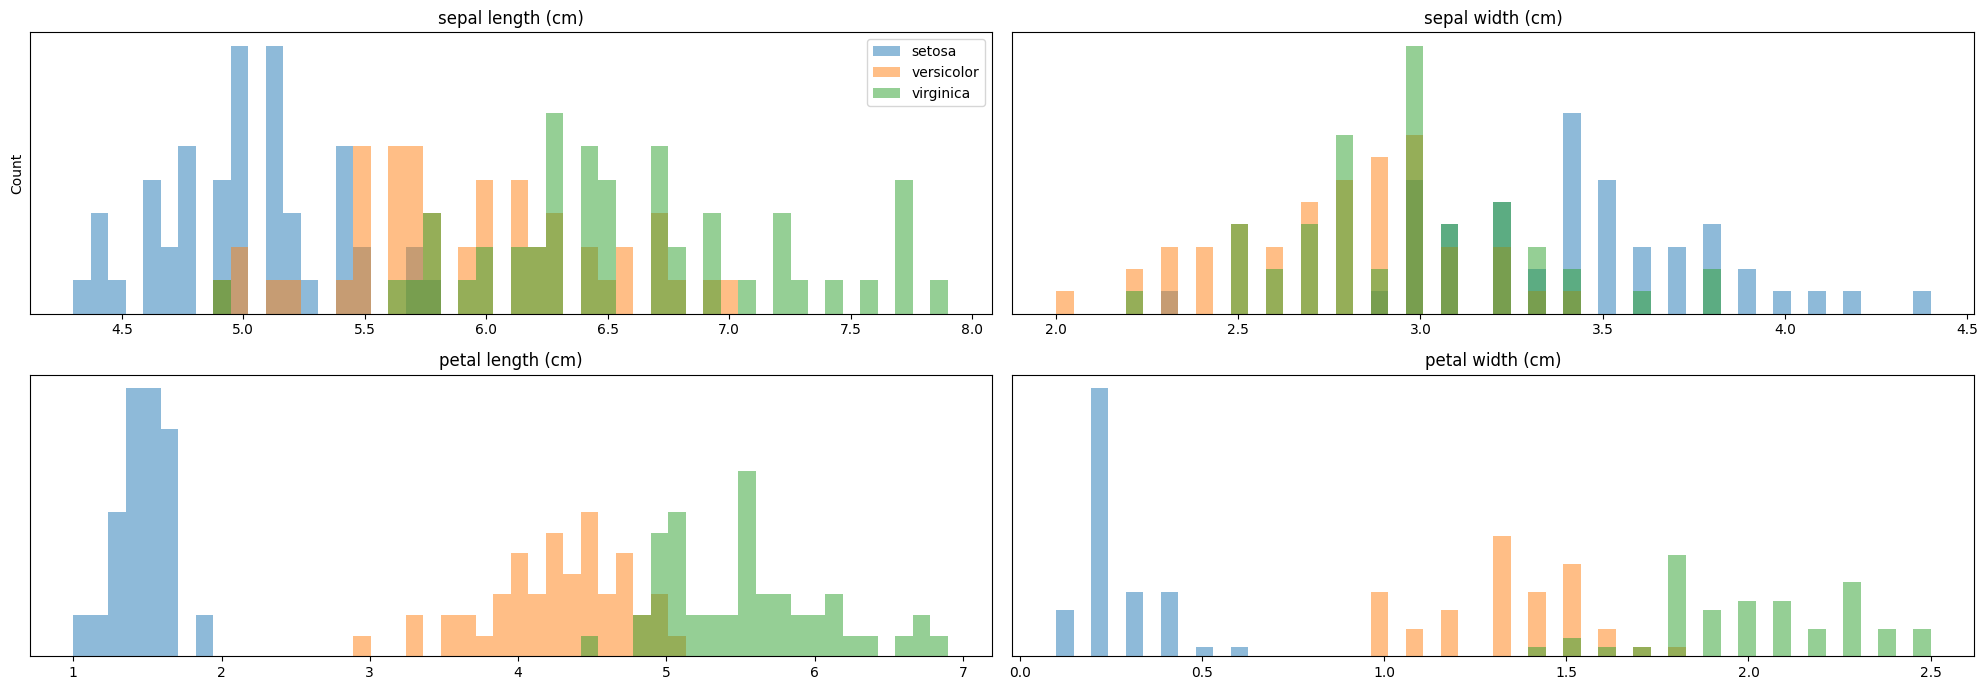

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(20,7))

iris_0 = iris.data[iris.target==0]
iris_1 = iris.data[iris.target==1]
iris_2 = iris.data[iris.target==2]

ax = axes.ravel()

for i in range(4):
    _, bins = np.histogram(iris.data[:,i],bins=50)
    ax[i].hist(iris_0[:,i],bins=bins,alpha=.5)
    ax[i].hist(iris_1[:,i],bins=bins,alpha=.5)
    ax[i].hist(iris_2[:,i],bins=bins,alpha=.5)
    ax[i].set_title(iris.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_ylabel('Count')
ax[0].legend(['setosa','versicolor','virginica'],loc='best')
fig.tight_layout()